COMP5930M Scientific Computation - Tutorial 3  \\
Newton's method for systems of equations

A basic implementation of the Newton method for systems consists of:

1.   For $k=0,1,.\ldots$: Evaluate current value of $F(x_k)$.
2.   Evaluate the Jacobian matrix $J(x_k)$.
3.   Solve the tangent problem: $J \delta = -F$.
4.   Update the iterate $x_{k+1} = x_k + \delta$.
5.   Repeat until one of the stopping criteria is reached.

In [130]:
import numpy as np
from numpy.linalg import norm

def myNewtonSys(fnon, jac, x0, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # jac      - name of the Jacobian function J(x)
    # x0       - initial guess for the solution x0
    # tol      - stopping tolerance for Newton's iteration
    # maxk     - maximum number of Newton iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)
    k = 0
    x = x0

    F = eval(fnon)(x,*fnonargs)

    print(' k    f(xk)')

    # Main Newton loop
    while (norm(F,2) > tol and k < maxk):
        # Evaluate Jacobian matrix
        J = eval(jac)(x,2,fnon,F,*fnonargs)

        # Take Newton step
        delta = np.linalg.solve(J,-F)
        x = x + delta
        F = eval(fnon)(x,*fnonargs)

        k += 1
        print('{0:2.0f}  {1:2.2e}'.format(k, norm(F,2)))

    if (k == maxk):
        print('Not converged')
    else:
        print('Converged to ')
        print(x)

Define the first example function and its derivative.

In [38]:
import numpy as np
import math

def example1(x):
    F = np.zeros((2,1), dtype=np.float64)
    F[0] = 2*x[0] - x[1] - math.exp(-x[0])
    F[1] = -x[0] + 2*x[1] - math.exp(-x[1])
    return F

def dExample1(x,n,fnon,F0,*fnonargs):
    J = np.zeros((2,2), dtype=np.float64)
    J[0,0] = 2 + math.exp(-x[0])
    J[0,1] = -1
    J[1,0] = -1
    J[1,1] = 2 + math.exp(-x[1])
    return J

Standard Newton's method converges from $(1,0)$ to $(0.567,0.567)$ in three iterations:

In [16]:
import numpy as np
x0 = np.zeros((2,1), dtype=np.float64)
x0[0] = 1
myNewtonSys("example1", "dExample1", x0, 1e-6, 100)

 k    f(xk)
 1  1.20e-01
 2  1.11e-03
 3  9.67e-08
Converged to 
[[0.56714325]
 [0.56714324]]


Plot the isocontours of the function $|F(x)|^2$:


<a list of 5 text.Text objects>

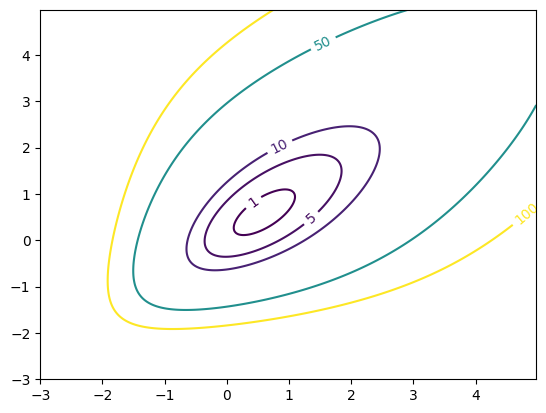

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

delta = 0.025
x = np.arange(-3.0, 5.0, delta)
y = np.arange(-3.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = 2*X - Y - np.exp(-X)
Z2 = -X + 2*Y - np.exp(-Y)
Z = Z1**2 + Z2**2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.array([1, 5, 10, 50, 100]))
ax.clabel(CS, inline=True, fontsize=10)

The robust convergence of Newton in this example can be explained by the convexity of the function $|F(x)|^2$ near the solution $x^*$.

Let's try a more difficult example:

In [37]:
import numpy as np
import math

def example2(x):
    F = np.zeros((2,1), dtype=np.float64)
    F[0] = -2*x[0]**2 + 3*x[0]*x[1] + 4*math.sin(x[1]) - 6
    F[1] = 3*x[0]**2 - 2*x[0]*x[1]**2 + 3*math.cos(x[0]) + 4
    return F

def dExample2(x,n,fnon,F0,*fnonargs):
    J = np.zeros((2,2), dtype=np.float64)
    J[0,0] = -4*x[0] + 3*x[1]
    J[0,1] = 3*x[0] + 4*math.cos(x[1])
    J[1,0] = 6*x[0] - 2*x[1]**2 - 3*math.sin(x[0])
    J[1,1] = -4*x[0]*x[1]
    return J

This function is much more complicated. There are at least two distinct solutions and the function grows very quickly away from the solutions.

<a list of 7 text.Text objects>

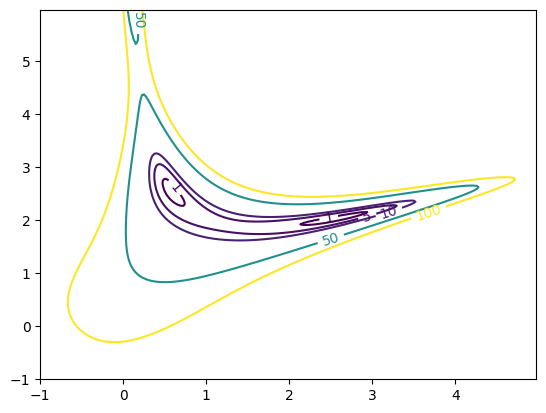

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

delta = 0.025
x = np.arange(-1.0, 5.0, delta)
y = np.arange(-1.0, 6.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = -2*X**2 + 3*X*Y + 4*np.sin(Y) - 6
Z2 = 3*X**2 - 2*X*Y**2 + 3*np.cos(X) + 4
Z = Z1**2 + Z2**2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.array([1, 5, 10, 50, 100]))
ax.clabel(CS, inline=True, fontsize=10)

Newton convergence is poor from many initial guesses:

In [132]:
import numpy as np
myNewtonSys("example2", "dExample2", np.array([[0.5],[3]]), 1e-6, 10)
myNewtonSys("example2", "dExample2", np.array([[2.5],[2]]), 1e-6, 20)
myNewtonSys("example2", "dExample2", np.array([[4],[1]]), 1e-6, 20)
myNewtonSys("example2", "dExample2", np.array([[0],[4]]), 1e-6, 20)

 k    f(xk)
 1  2.00e-01
 2  8.07e-03
 3  2.58e-06
 4  3.81e-13
Converged to 
[[0.57982909]
 [2.54620921]]
 k    f(xk)
 1  9.89e-03
 2  2.75e-05
 3  9.92e-11
Converged to 
[[2.59216492]
 [2.04115225]]
 k    f(xk)
 1  1.42e+01
 2  8.71e+00
 3  8.77e+03
 4  2.20e+03
 5  5.40e+02
 6  1.32e+02
 7  2.87e+01
 8  1.08e+01
 9  1.38e+01
10  8.58e+01
11  2.60e+01
12  2.14e+01
13  1.28e+01
14  3.72e+01
15  1.52e+01
16  6.76e+01
17  1.78e+01
18  4.98e+01
19  1.69e+02
20  4.04e+02
Not converged
 k    f(xk)
 1  6.11e+00
 2  2.70e+02
 3  2.08e+02
 4  5.83e+01
 5  1.18e+01
 6  2.21e+00
 7  4.31e+00
 8  1.38e+00
 9  4.47e+00
10  1.38e+00
11  4.24e+00
12  1.37e+00
13  4.34e+00
14  1.37e+00
15  4.46e+00
16  1.39e+00
17  3.95e+00
18  1.34e+00
19  5.50e+00
20  1.43e+00
Not converged


In case we don't want to implement the exact Jacobian matrix, we can use numerical finite difference approximations to compute the Jacobian with $n$ function calls:

In [131]:
import numpy as np
import copy

def fdJacobian(x,n,fnon,F0,*fnonargs):
  J = np.zeros((n,n), dtype=np.float64)
  h = 10e-8

  for k in range(0,n):
    xb = copy.copy(x)
    xb[k] = xb[k] + h

    F = eval(fnon)(xb,*fnonargs)

    for i in range(0,n):
        J[i,k] = (F[i] - F0[i]) / h

  return J

The numerical Jacobian differs slightly from the exact Jacobian, but generally this does not affect the convergence behaviour:

In [135]:
import numpy as np
myNewtonSys("example2", "fdJacobian", np.array([[0.5],[3]]), 1e-6, 10)
myNewtonSys("example2", "fdJacobian", np.array([[2.5],[2]]), 1e-6, 20)
#myNewtonSys("example2", "fdJacobian", np.array([[4],[1]]), 1e-6, 20)
#myNewtonSys("example2", "fdJacobian", np.array([[0],[4]]), 1e-6, 20)

 k    f(xk)
 1  2.00e-01
 2  8.07e-03
 3  2.58e-06
 4  3.16e-13
Converged to 
[[0.57982909]
 [2.54620921]]
 k    f(xk)
 1  9.89e-03
 2  2.75e-05
 3  1.01e-10
Converged to 
[[2.59216492]
 [2.04115225]]
